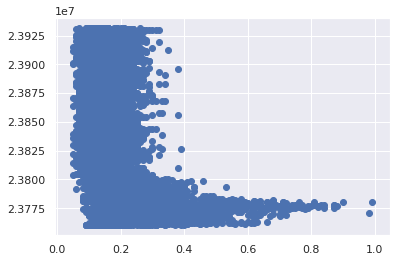

In [7]:
import pylab as pl
import numpy as np
X = lista['S4']
Y = lista['Tiempo']




pl.scatter(X,Y)


In [ ]:
import os
import gzip
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import datetime
import time
    



def obtaindateliteral(yday,year):

    if(year<10):
        string=str(yday)+","+"0"+str(year)
    else:
        string=str(yday)+","+str(year)
    time_1 = time.strptime(string,"%j,%y")

    
    #time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)
    return (time.strftime("%B",time_1))


    
def agregaarchivo(data_file,df_marks):
    
    # Delimiter
    data_file_delimiter ='\s+'
    
    # The max column count a line in the file could have
    largest_column_count = 0

    # Loop the data lines
    with open(data_file, 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()

        for l in lines:
            # Count the column count for the current line
            column_count = len(l.split())+ 1

            # Set the new most column count
            largest_column_count = column_count if largest_column_count < column_count else largest_column_count

    # Close file
    temp_f.close()

    # Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
    column_names = [i for i in range(0, largest_column_count)]

    # Read csv
    df = pd.read_csv(data_file, header=None, delim_whitespace=True, names=column_names)
    # print(df)

    row=df.shape[0]
    column=df.shape[1]
    print(row)
    print(column)


    Satélite=0
    S4=0
    for y in range(0, df.shape[0]):
        Año=df[0][y]
        Day=df[1][y]
        Tiempo=df[2][y]
        Mes=obtaindateliteral(Day,Año)[1]
        Año=obtaindateliteral(Day,Año)[0]    
        Nsats=df[3][y]
        #print("#Satélite:",Nsats)
        for x in range(0,df.shape[1]):
            if (x-4)%4==0 and ((Nsats+1)*4)> x > 3:
                #print("x:",x)
                #print("Satélite:",df[x][y])
                Satélite=df[x][y]

            if (x-5) % 4==0 and ((Nsats+1)*4)>x>4:
                #print("S4:",df[x][y])
                S4=df[x][y]

            if (x-6) % 4==0 and ((Nsats+1)*4)>x>5:
                #print("Az:",df[x][y])
                Az=df[x][y]

            if (x-7) % 4==0 and ((Nsats+1)*4)>x>6:
                #print("Elv:",df[x][y])
                Elv=df[x][y]



                new_row = { 'Año':Año,'Mes':Mes,'Day':Day,'Tiempo':Tiempo,'PRN':Satélite, 'S4':S4,'Az':Az,'Elv':Elv}
                #append row to the dataframe
                df_marks = df_marks.append(new_row, ignore_index=True)

    return df_marks

 

def devolverArchivos(carpeta):

    count=0

    for archivo in os.listdir(carpeta):

            count=count+1
            with gzip.open(os.path.join(carpeta,archivo), 'rb') as f_in:
                with open('/home/gfajardo/Desktop/Datos 121001/lji.s4', 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
 

            # Input
            data_file='/home/gfajardo/Desktop/Datos 121001/lji.s4'
        
            if (count<2):
                        #Creating a new dataframe
                df_marks = pd.DataFrame(columns=['Año','Mes','Day','Tiempo','PRN','S4','Az','Elv'])        
                listaF=agregaarchivo(data_file,df_marks)
                print(count)
            else:
                listaF=agregaarchivo(data_file,listaF)
                #print(os.path.join(carpeta,archivo))
                print(count)

            if os.path.isdir(os.path.join(carpeta,archivo)):
                devolverArchivos(os.path.join(carpeta,archivo)) #parte recursiva, es decir para leer todas las subcarpetas
    
    return(listaF)          

            
Mli2=devolverArchivos("/home/gfajardo/Desktop/Datos 121001/gfajardo_ntVWPb/")
#devolverArchivos("/home/gfajardo/Desktop/Datos 121001/gfajardo_9sbmuc/")
print(Mli2)
#devolverArchivos("/home/gfajardo/Desktop/Datos 121001/gfajardo_9sbmuc")
Mli2.to_csv(r'/home/gfajardo/Desktop/Datos 121001/gfajardo_ntVWPb/2012.csv')

1429
49


In [1]:
import pylab as pl
import numpy as np
X = Mli2['S4']
Y = Mli2['Tiempo']/3600




pl.scatter(Y,X,color='red')

NameError: name 'Mli' is not defined

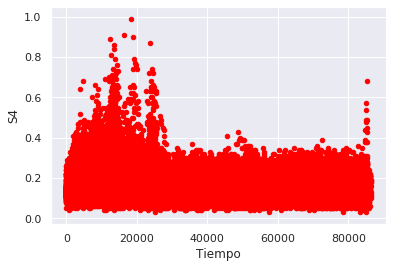

In [19]:
import pylab as pl
import numpy as np
x = Mli2['S4']
y = Mli2['Tiempo']


Mli2.plot(kind='scatter',x='Tiempo',y='S4',color='red')
plt.show()
#pl.scatter(X,Y)

[0.21 0.12 0.16 ... 0.31 0.1  0.12]
[[ 5. 16.]
 [12. 43.]
 [27. 35.]
 ...
 [28. 14.]
 [15. 39.]
 [17. 35.]]


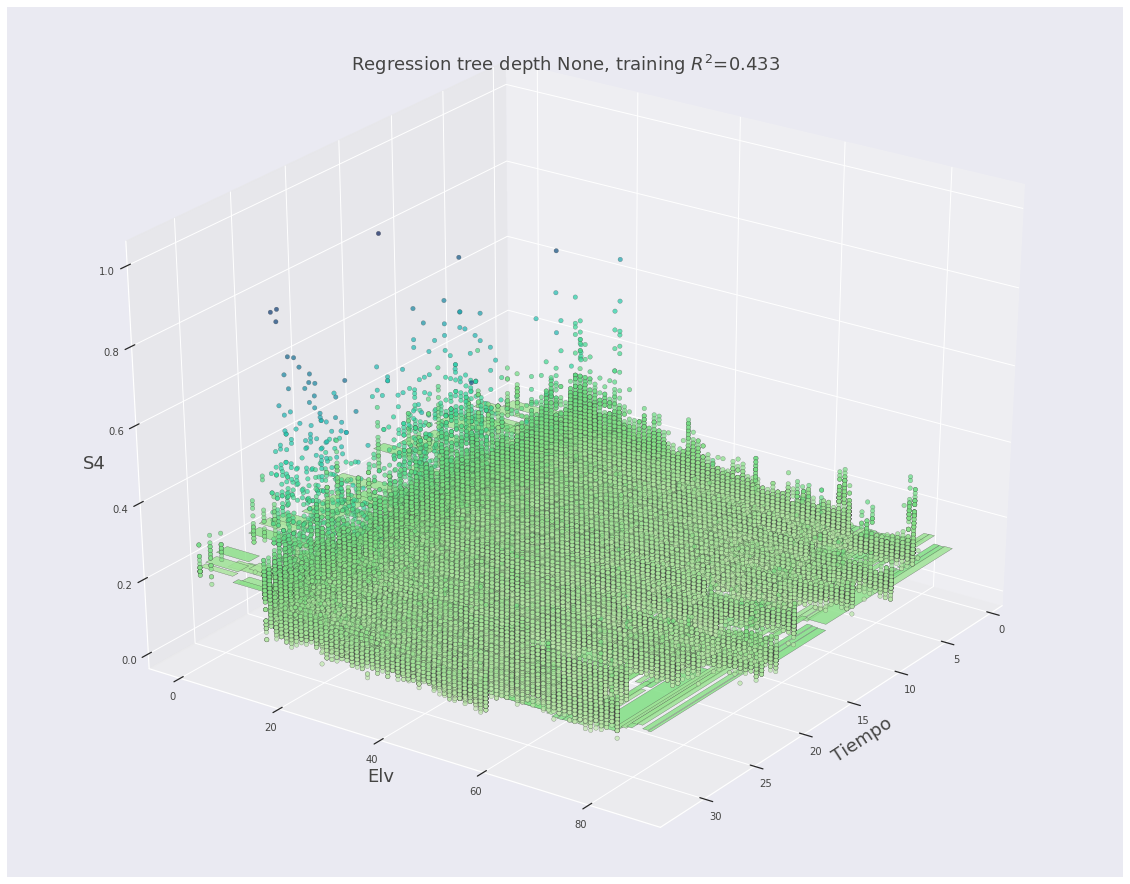

In [24]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

from mpl_toolkits.mplot3d import Axes3D
from dtreeviz.trees import *





y = Mli['S4'].values

print(y)

features = [3,6]
X = Mli.values[:,features]
#X=ion['60S','Sig'].values
print(X)

figsize = (20,16)
fig = plt.figure(figsize=figsize)


ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(ax,
                      X, y,
                      max_depth=None,
                      feature_names=['Tiempo','Elv'],
                      target_name='S4',
                      fontsize=18,
                      elev=30,
                      azim=35,
                      dist=10,
                      show={'splits','title'})




            
plt.show()

In [29]:
import os
import gzip
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt








    
def agregaarchivo(data_file,df_marks):
    
    # Delimiter
    data_file_delimiter ='\s+'
    
    # The max column count a line in the file could have
    largest_column_count = 0

    # Loop the data lines
    with open(data_file, 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()

        for l in lines:
            # Count the column count for the current line
            column_count = len(l.split())+ 1

            # Set the new most column count
            largest_column_count = column_count if largest_column_count < column_count else largest_column_count

    # Close file
    temp_f.close()

    # Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
    column_names = [i for i in range(0, largest_column_count)]

    # Read csv
    df = pd.read_csv(data_file, header=None, delim_whitespace=True, names=column_names)
    # print(df)

    row=df.shape[0]
    column=df.shape[1]
    print(row)
    print(column)


    Satélite=0
    S4=0
    for y in range(0, df.shape[0]):
        Año=df[0][y]
        Tiempo=df[1][y]*24*3600+df[2][y]
        Nsats=df[3][y]
        #print("#Satélite:",Nsats)
        for x in range(0,df.shape[1]):
            if (x-4)%4==0 and ((Nsats+1)*4)> x > 3:
                #print("x:",x)
                #print("Satélite:",df[x][y])
                Satélite=df[x][y]

            if (x-5) % 4==0 and ((Nsats+1)*4)>x>4:
                #print("S4:",df[x][y])
                S4=df[x][y]

            if (x-6) % 4==0 and ((Nsats+1)*4)>x>5:
                #print("Az:",df[x][y])
                Az=df[x][y]

            if (x-7) % 4==0 and ((Nsats+1)*4)>x>6:
                #print("Elv:",df[x][y])
                Elv=df[x][y]



                new_row = { 'Año':Año,'Tiempo':Tiempo,'PRN':Satélite, 'S4':S4,'Az':Az,'Elv':Elv}
                #append row to the dataframe
                df_marks = df_marks.append(new_row, ignore_index=True)

    return df_marks

 


def devolverArchivos(carpeta):

    count=0

    #for archivo in os.listdir(carpeta):
    for root, dirs, files in os.walk(carpeta):
        for name in files:
            #if name.endswith((".giz", ".htm")):
            if name.endswith((".gz")):
                count=count+1
                with gzip.open(os.path.join(carpeta,archivo), 'rb') as f_in:
                    with open('/home/gfajardo/Desktop/Datos 121001/lji.s4', 'wb') as f_out:
                        shutil.copyfileobj(f_in, f_out)
                print(count)
                if (count<2):

                         # Input
                    data_file='/home/gfajardo/Desktop/Datos 121001/lji.s4'
                            #Creating a new dataframe
                    df_marks = pd.DataFrame(columns=['Año','Tiempo','PRN','S4','Az','Elv'])        
                    lista=agregaarchivo(data_file,df_marks)
                else:
                    lista=agregaarchivo(data_file,lista)
                    #print(os.path.join(carpeta,archivo))

                if os.path.isdir(os.path.join(carpeta,archivo)):
                    devolverArchivos(os.path.join(carpeta,archivo)) #parte recursiva, es decir para leer todas las subcarpetas


devolverArchivos("/home/gfajardo/Desktop/Datos 121001/")
#devolverArchivos("/home/gfajardo/Desktop/Datos 121001/gfajardo_9sbmuc/")
print(lista)

FileNotFoundError: [Errno 2] No such file or directory: '/home/gfajardo/Desktop/Datos 121001/lji__121005.s4.gz'

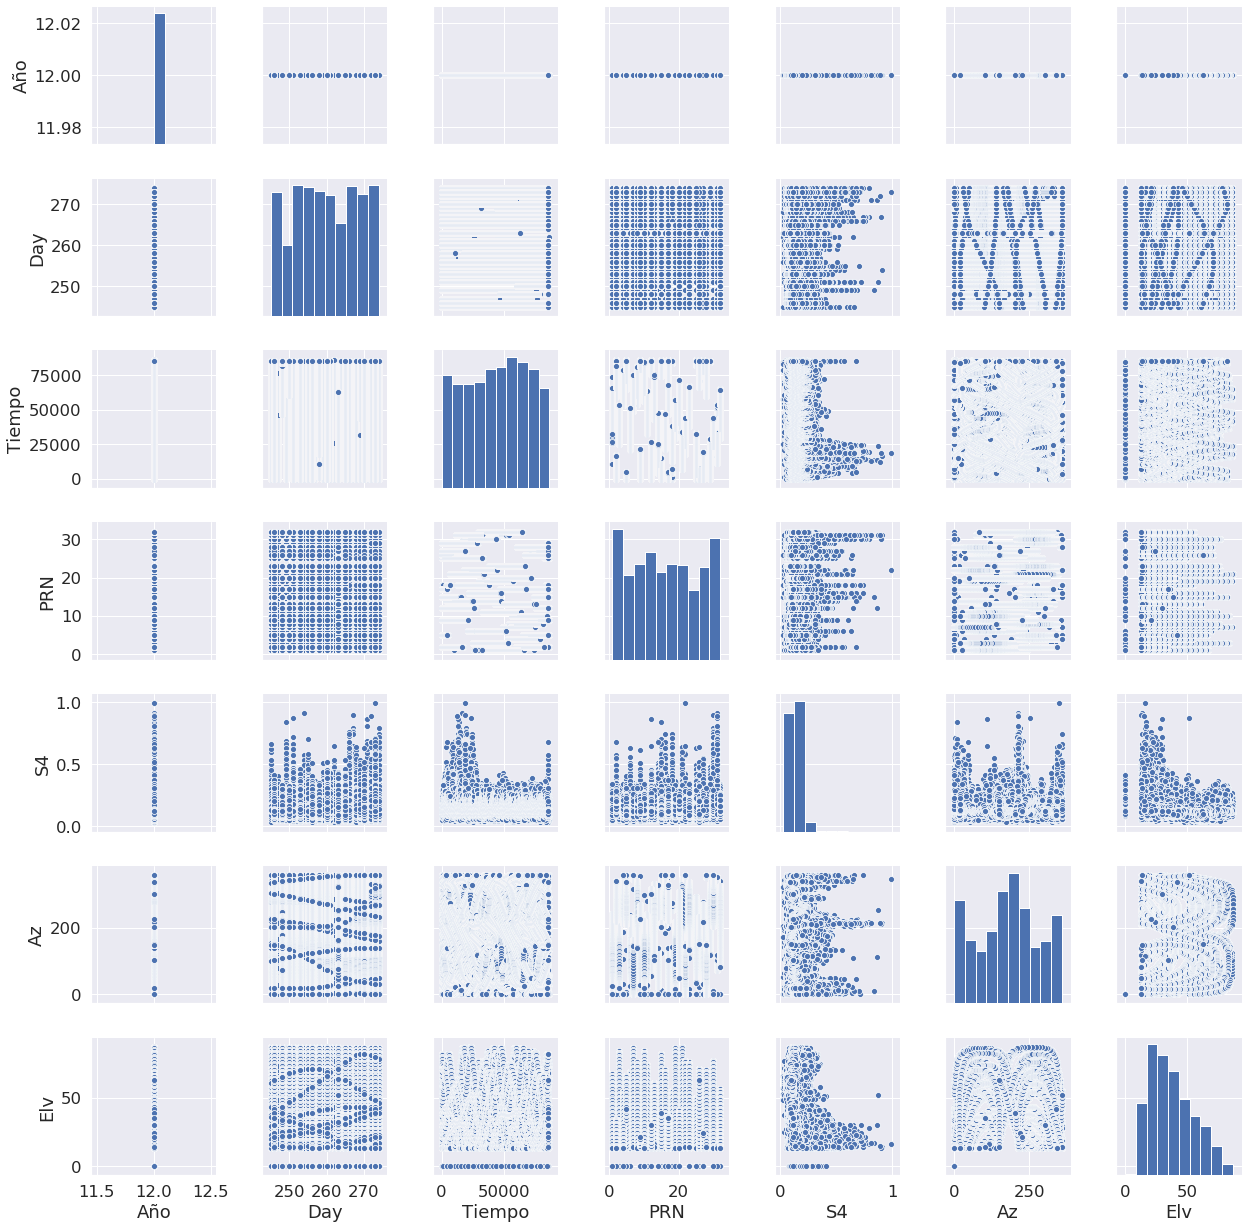

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
sns.pairplot(Mli, hue=None, height=2.5);

In [26]:
corr = Mli.corr()
corr.style.background_gradient(cmap='RdBu_r')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

/home/gfajardo/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Año,Day,Tiempo,PRN,S4,Az,Elv
Año,nan,nan,nan,nan,nan,nan,nan
Day,nan,1,-0.0190465,0.0107511,0.0464603,0.000314799,-0.00205022
Tiempo,nan,-0.0190465,1,-0.220394,-0.112888,0.0330885,-0.0211183
PRN,nan,0.0107511,-0.220394,1,0.026018,0.039228,-0.0117816
S4,nan,0.0464603,-0.112888,0.026018,1,-0.0332438,-0.448565
Az,nan,0.000314799,0.0330885,0.039228,-0.0332438,1,-0.0365018
Elv,nan,-0.00205022,-0.0211183,-0.0117816,-0.448565,-0.0365018,1


In [21]:
M.to_csv(r'/home/gfajardo/Desktop/Datos 121001/gfajardo_ntVWPb/2012.csv')

In [78]:
#import the datetime module

import datetime
import time

dateToday = datetime.datetime.today()

#Get the attributes of the datetime instance as a tuple
attributesInTuple = dateToday.timetuple()
 
# print the tuple elements using a for loop
print(attributesInTuple.tm_yday)


#https://docs.python.org/2/library/time.html#time.struct_time
time_1 = time.strptime("252,13","%j,%y")
print(time_1.tm_year)
print(time_1.tm_mon)

d2 = time.strftime("%B",time_1)
#time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)
print( d2)


261
2013
9
September


In [154]:
def obtaindateliteral(yday,year):
    import datetime
    import time
    
    if(year<10):
        string=str(yday)+","+"0"+str(year)
    else:
        string=str(yday)+","+str(year)
    time_1 = time.strptime(string,"%j,%y")
    a=time_1.tm_year

    b = time.strftime("%B",time_1)
    #time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)
    return (a,b)

print(obtaindateliteral(32,70))

(1970, 'February')
